In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import cm

In [5]:
non_isr = pd.read_csv('Data\salary_non_israeli.csv')
hightech_empl = pd.read_csv('Data\hightech_employees.csv')
empl_by_sector = pd.read_csv('Data\employees_by_sector.csv')
total_empl_perc = pd.read_csv('Data\perc_of_total_employees_23.csv')
positions_by_industry = pd.read_csv('Data\positions_by_industry.csv')
wages_by_sector = pd.read_csv('Data\wages_by_sector.csv')
hightech_wages = pd.read_csv('Data\wages_hightech.csv')
analysts = pd.read_csv('Data\dataanalyst_position.csv')
data_sci = pd.read_csv('Data\data_sci.csv')
pm = pd.read_csv('Data\prod_mng.csv')

In [46]:
analysts.head(2)

,id,company,position,level,sphere,type,date_post,in_hours,appliers
0,1,Wolt,Data Analyst,Junior,technology,B2C,26.09.23,0.3,3
1,2,Stratasys,Marketing Data Analyst,Junior,manufacturing,B2B,26.09.23,0.4,276


In [6]:
analysts['applic_per_hour'] = analysts['appliers']/analysts['in_hours']
analysts.head(3)

,id,company,position,level,sphere,type,date_post,in_hours,appliers,applic_per_hour
0,1,Wolt,Data Analyst,Junior,technology,B2C,26.09.23,0.3,3,10.0
1,2,Stratasys,Marketing Data Analyst,Junior,manufacturing,B2B,26.09.23,0.4,276,690.0
2,3,Moonee,Data Analyst,Mid-Senior,technology,B2C,26.09.23,1.0,140,140.0


In [9]:
data_sci['applic_per_hour'] = data_sci['appliers']/data_sci['in_hours']
data_sci.head(3)

,id,company,position,level,sphere,date_post,in_hours,appliers,applic_per_hour
0,1,Teva,Data Science Expert,Mid-Senior,Manufacturing,24.09.23,168,195,1.160714
1,2,Unity,Data Scientist,Senior,Software Development,10.09.23,504,167,0.331349
2,3,Cross River,Data Scientist,Entry,Financial Services,24.09.23,168,174,1.035714


In [10]:
pm['applic_per_hour'] = pm['appliers']/pm['in_hours']
pm.head(3)

,id,company,position,level,sphere,date_post,in_hours,appliers,applic_per_hour
0,1,Shva,Product Data Manager,Mid-Senior,Finatech,28.09.23,96,94,0.979167
1,2,Oddity,Product Manager,Mid-Senior,Technology,02.07.23,2184,1110,0.508242
2,3,WxinSys,Product Manager,Mid-Senior,Manufacturing,28.08.23,1464,291,0.198770


In [15]:
print((analysts['applic_per_hour'].mean().round(2)),'- Average data analyst applicants per hour')
print((data_sci['applic_per_hour'].mean().round(2)),'- Average data scientist applicants per hour')
print((pm['applic_per_hour'].mean().round(2)),'- Average product manager applicants per hour')

9.46 - Average data analyst applicants per hour
0.67 - Average data scientist applicants per hour
2.04 - Average product manager applicants per hour


In [16]:
print((analysts['applic_per_hour'].median().round(2)),'- Median number of data analyst applications per hour')
print((data_sci['applic_per_hour'].median().round(2)),'- Median number of data scientist applications per hour') 
print((pm['applic_per_hour'].median().round(2)),'- Median number of product manager applications per hour') 

0.5 - Median number of data analyst applications per hour
0.23 - Median number of data scientist applications per hour
0.64 - Median number of product manager applications per hour


In [19]:
print('DATA ANALYSTS',(analysts['level'].value_counts())) # How many times each seniority level appears in the dataframe
print('DATA SCIENTISTS',(data_sci['level'].value_counts()))
print('PRODUCT MANAGERS',(pm['level'].value_counts()))

DATA ANALYSTS level
Mid-Senior    44
Senior        33
Junior        13
Mid           13
Name: count, dtype: int64
DATA SCIENTISTS level
Mid-Senior    19
Senior        14
Entry          2
Name: count, dtype: int64
PRODUCT MANAGERS level
Mid-Senior    49
Senior        14
Entry          2
Name: count, dtype: int64


In [55]:
print(analysts['sphere'].value_counts()) # What the most populat sphere is

sphere
technology       69
manufacturing    15
capital           6
consulting        5
service           5
e-commerce        3
Name: count, dtype: int64


In [56]:
print(analysts['type'].value_counts()) # What the most populat company type is

type
B2B         47
B2C, B2B    32
B2C         24
Name: count, dtype: int64


NON-CITIZEN RESIDENTS IN ISRAEL

In [4]:
non_isr.head(2)

,Date,Other industries,Thereof: Home-care services,Thereof: Employment activities,Accommodation and food service activities,Construction,"Agriculture, forestry and fishing"
0,"September, 2020","8,988","4,111","6,124","6,821","8,431","6,825"
1,"October, 2020","9,245","4,021","6,738","6,925","8,854","6,920"


In [5]:
non_isr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date                                       28 non-null     object
 1   Other industries                           28 non-null     object
 2   Thereof: Home-care services                28 non-null     object
 3   Thereof: Employment activities             28 non-null     object
 4   Accommodation and food service activities  28 non-null     object
 5   Construction                               28 non-null     object
 6   Agriculture, forestry and fishing          28 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


In [6]:
non_isr = non_isr.rename(columns={'Date' : 'Date',
                                  'Other industries' : 'Other',
                                  'Thereof: Home-care services' : 'Health Care',
                                  'Thereof: Employment activities' : 'Employment activities',
                                  'Accommodation and food service activities' : 'Accomodation & Food',
                                  'Construction' : 'Construction',
                                  'Agriculture, forestry and fishing' : 'Agri-Fishing'
                                    })

In [8]:
numeric_columns = non_isr.columns.difference(['Date'])
non_isr[numeric_columns] = non_isr[numeric_columns].applymap(lambda x: int(str(x).replace(',', '').replace('\t', '')) if isinstance(x, str) else x)
non_isr_avgs = non_isr[numeric_columns].mean().sort_values(ascending=False).round(1)
print(non_isr_avgs)

Other                    10576.0
Accomodation & Food       9612.0
Construction              9032.8
Agri-Fishing              6839.2
Employment activities     6813.3
Health Care               4033.8
dtype: float64


C:\Users\rzagu\AppData\Local\Temp\ipykernel_10360\1143648995.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


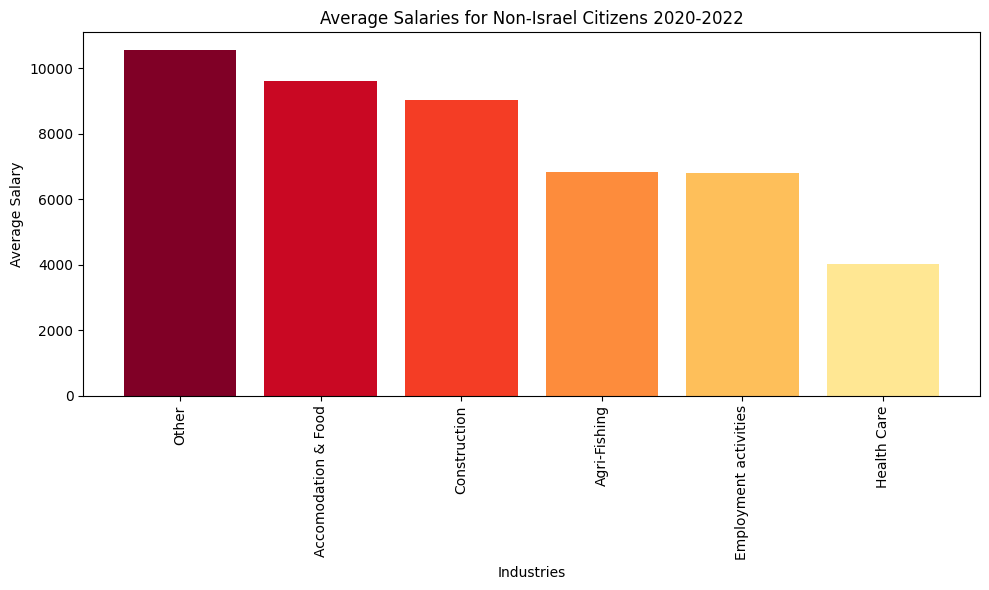

In [10]:
cmap = cm.get_cmap('YlOrRd')
plt.figure(figsize=(10, 6))
bars = plt.bar(non_isr_avgs.index, non_isr_avgs.values, color=[cmap(1-i/len(non_isr_avgs)) for i in range(len(non_isr_avgs))])
plt.xlabel('Industries')
plt.ylabel('Average Salary')
plt.title('Average Salaries for Non-Israel Citizens 2020-2022')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [11]:
print(non_isr.columns.tolist())

['Date', 'Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']


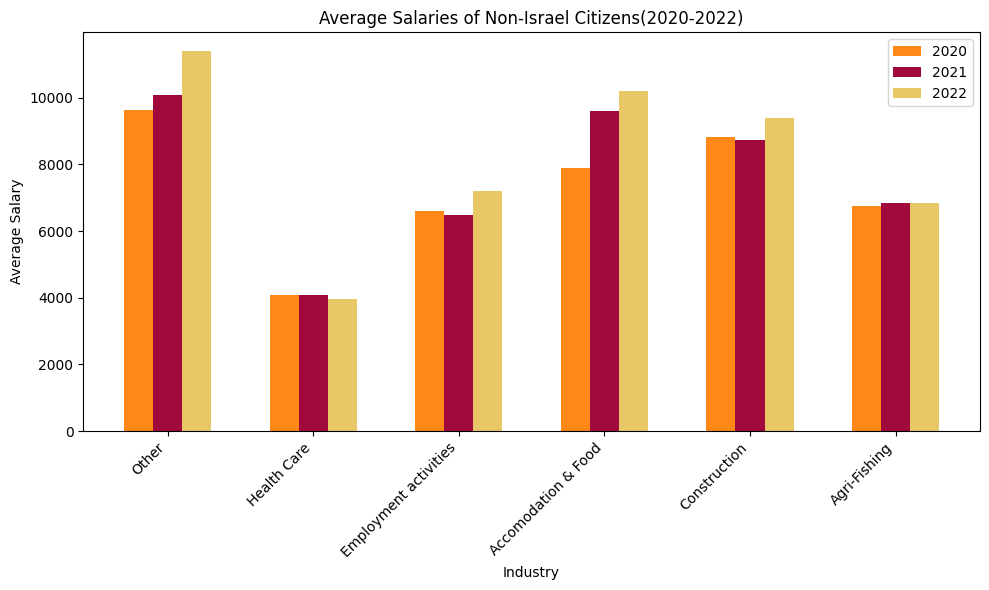

In [23]:

# Calculating yearly averages
nonisr_averages_2020 = non_isr_2020[['Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']].mean().round(2)
nonisr_averages_2021 = non_isr_2021[['Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']].mean().round(2)
nonisr_averages_2022 = non_isr_2022[['Other', 'Health Care', 'Employment activities', 'Accomodation & Food', 'Construction', 'Agri-Fishing']].mean().round(2)

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis values and width of the bars
x = np.arange(len(nonisr_averages_2020))
bar_width = 0.2

# Plot the bars for 2020, 2021, and 2022
plt.bar(x - bar_width, nonisr_averages_2020, bar_width, color='#ff8817', label='2020')
plt.bar(x, nonisr_averages_2021, bar_width, color='#a1083b', label='2021')
plt.bar(x + bar_width, nonisr_averages_2022, bar_width, color='#e8c766', label='2022')

# Set the x-axis labels to the column names
plt.xticks(x, nonisr_averages_2020.index, rotation=45, ha="right")

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Average Salaries of Non-Israel Citizens(2020-2022)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


SALARIES BY SECTOR FOR ISRAEL CITIZENS

In [24]:
wages_by_sector.head(2)

,date,private non-profit institutions,house-holds,public non-profit institutions,local authorities,"central government, national insurance institute and national institutions",insurance corporations and pension funds,"financial auxilaries, captive financial institutions and money lenders",other financial intermediaries,monetary financial institutions,non-financial_cooperatives,private_non_financial_ corporation,Unnamed: 12
0,"March, 2022","6,295","5,620","8,876","8,796","14,448","23,935","25,551","27,803","28,228","11,442","13,835",NaN
1,"April, 2022","6,065","5,503","8,966","8,906","14,012","20,585","20,238","24,853","51,543","10,729","12,754",NaN


In [26]:
wages_by_sector.drop(columns=['Unnamed: 12'], inplace=True)

In [39]:
wages_by_sector = wages_by_sector.rename(columns={'Date' : 'Date',
                                                  'private non-profit institutions': 'private non-profit',
                                                  'house-holds' : 'house-holds',
                                                  'public  non-profit institutions' : 'public non-profit',
                                                  'local  authorities' : 'local  authorities',
                                                  'central government, national insurance institute and national institutions ' : 'government and national institutions',
                                                  'insurance corporations and pension funds' : 'insurers and pension funds',
                                                  'financial auxilaries, captive financial institutions and money lenders' : 'financial institutions',
                                                  'other financial  intermediaries' : 'other financial',
                                                  'monetary financial institutions' : 'monetary institutions',
                                                  'non-financial_cooperatives' : 'non-fin cooperatives',
                                                  'private_non_financial_ corporation' : 'private non-fin cooperatives'
                                                  })

In [41]:
wages_by_sector[['private non-profit',
                 'house-holds',
                 'public non-profit',
                 'local  authorities',
                 'government and national institutions',
                 'insurers and pension funds',
                 'financial institutions',
                 'other financial',
                 'monetary institutions',
                 'non-fin cooperatives',
                 'private non-fin cooperatives']] = wages_by_sector[['private non-profit',
                                                                        'house-holds',
                                                                        'public non-profit',
                                                                        'local  authorities',
                                                                        'government and national institutions',
                                                                        'insurers and pension funds',
                                                                        'financial institutions',
                                                                        'other financial',
                                                                        'monetary institutions',
                                                                        'non-fin cooperatives',
                                                                        'private non-fin cooperatives']].applymap(
    lambda x: int(str(x).replace(',', '').replace('\t', '')) if isinstance(x, str) else x
)

In [43]:
avg_wages_by_sector = wages_by_sector[['private non-profit',
                                        'house-holds',
                                        'public non-profit',
                                        'local  authorities',
                                        'government and national institutions',
                                        'insurers and pension funds',
                                        'financial institutions',
                                        'other financial',
                                        'monetary institutions',
                                        'non-fin cooperatives',
                                        'private non-fin cooperatives']].mean().sort_values(ascending=False).round(1)
print(avg_wages_by_sector)

monetary institutions                   28973.7
other financial                         20189.3
financial institutions                  20100.0
insurers and pension funds              18963.4
government and national institutions    15644.2
private non-fin cooperatives            13199.2
non-fin cooperatives                    10973.8
local  authorities                       9845.4
public non-profit                        9559.3
private non-profit                       6555.1
house-holds                              6139.6
dtype: float64


C:\Users\rzagu\AppData\Local\Temp\ipykernel_10360\3988443271.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')


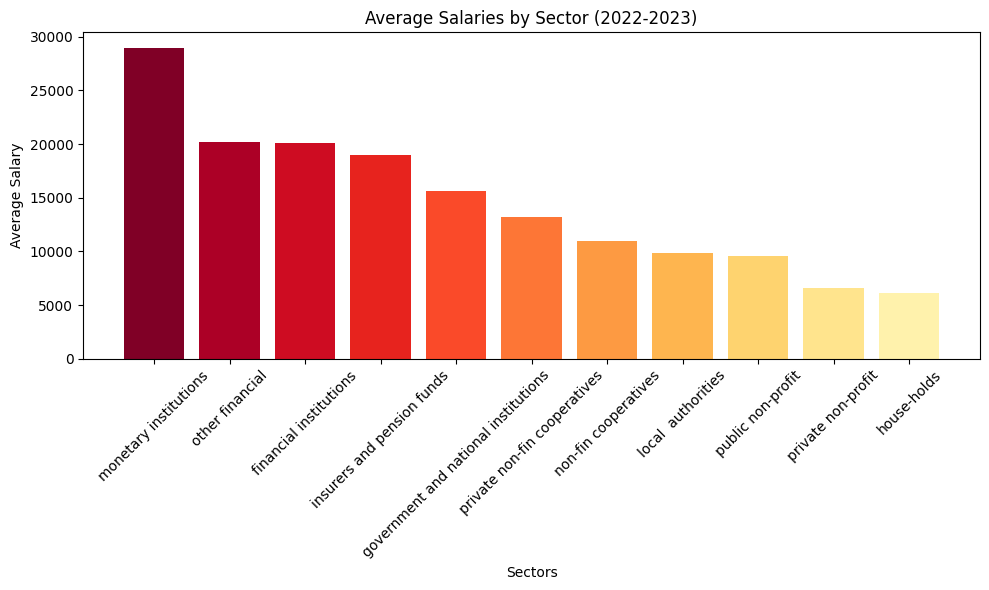

In [45]:
cmap = cm.get_cmap('YlOrRd')
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_wages_by_sector.index, avg_wages_by_sector.values, color=[cmap(1-i/len(avg_wages_by_sector)) for i in range(len(avg_wages_by_sector))])
plt.xlabel('Sectors')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Sector (2022-2023)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()